<a href="https://colab.research.google.com/github/BuxGuerra/TPICD/blob/main/importanciaCaracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/BuxGuerra/TPICD.git

fatal: destination path 'TPICD' already exists and is not an empty directory.


In [ ]:
#Dicionário para guardar finalistas:
seasonFirstSecond = {'2010-11':('Dallas Mavericks','Miami Heat'),
                     '2011-12':('Miami Heat','Oklahoma City Thunder'),
                     '2012-13':('Miami Heat','San Antonio Spurs'),
                     '2013-14':('San Antonio Spurs','Miami Heat'),
                     '2014-15':('Golden State Warriors','Cleveland Cavaliers'),
                     '2015-16':('Cleveland Cavaliers','Golden State Warriors'),
                     '2016-17':('Golden State Warriors','Miami Heat'),
                     '2017-18':('Dallas Mavericks','Cleveland Cavaliers'),
                     '2018-19':('Toronto Raptors','Golden State Warriors'),
                     '2019-20':('Los Angeles Lakers','Miami Heat'),
                     '2020-21':('Milwaukee Bucks','Phoenix Suns'),
                     '2021-22':('Golden State Warriors','Boston Celtics'),
                     '2022-23':('Denver Nuggets','Miami Heat'),}


#Dicionário para guardar resultado:
importanciaEstatisticas = {'W_RANK': 0, 'L_RANK': 0, 'W_PCT_RANK': 0, 'MIN_RANK': 0, 'FGM_RANK': 0, 'FGA_RANK': 0, 'FG_PCT_RANK': 0, 'FG3M_RANK': 0, 'FG3A_RANK': 0, 'FG3_PCT_RANK': 0, 'FTM_RANK': 0, 'FTA_RANK': 0, 'FT_PCT_RANK': 0, 'OREB_RANK': 0, 'DREB_RANK': 0, 'REB_RANK': 0, 'AST_RANK': 0, 'TOV_RANK': 0, 'STL_RANK': 0, 'BLK_RANK': 0, 'BLKA_RANK': 0, 'PF_RANK': 0, 'PFD_RANK': 0, 'PTS_RANK': 0, 'PLUS_MINUS_RANK': 0}



In [ ]:
def contarImportancia(importanciaEstatisticas, filePath, finalistas):
  df = pd.read_csv(filePath)

  first = df.loc[df['TEAM_NAME'] == finalistas[0]]
  second = df.loc[df['TEAM_NAME'] == finalistas[1]]

  firstRanks = first.iloc[:,30:]
  secondRanks = second.iloc[:,30:]

  for col in firstRanks.columns:
    if(firstRanks[col].item() <= 4):
      importanciaEstatisticas[col] = importanciaEstatisticas[col] + 1

  for col in secondRanks.columns:
    if(secondRanks[col].item() <= 4):
      importanciaEstatisticas[col] = importanciaEstatisticas[col] + 1


In [ ]:
directory = '/content/TPICD/bases'

for fileName in os.listdir(directory):
    if(fileName != '.ipynb_checkpoints'):
      filePath = os.path.join(directory, fileName)
      season = fileName.split('.csv')[0]
      contarImportancia(importanciaEstatisticas, filePath, seasonFirstSecond[season])



In [ ]:
importanciaEstatisticasAux = {}

for key in importanciaEstatisticas:
  newKey = key.split('_RANK')[0]
  importanciaEstatisticasAux[newKey] = importanciaEstatisticas[key]

importanciaEstatisticas = importanciaEstatisticasAux


In [ ]:
importanciaEstatisticas

{'W': 17,
 'L': 17,
 'W_PCT': 17,
 'MIN': 4,
 'FGM': 10,
 'FGA': 3,
 'FG_PCT': 15,
 'FG3M': 9,
 'FG3A': 6,
 'FG3_PCT': 9,
 'FTM': 2,
 'FTA': 3,
 'FT_PCT': 7,
 'OREB': 0,
 'DREB': 11,
 'REB': 2,
 'AST': 9,
 'TOV': 3,
 'STL': 6,
 'BLK': 8,
 'BLKA': 15,
 'PF': 6,
 'PFD': 0,
 'PTS': 7,
 'PLUS_MINUS': 15}

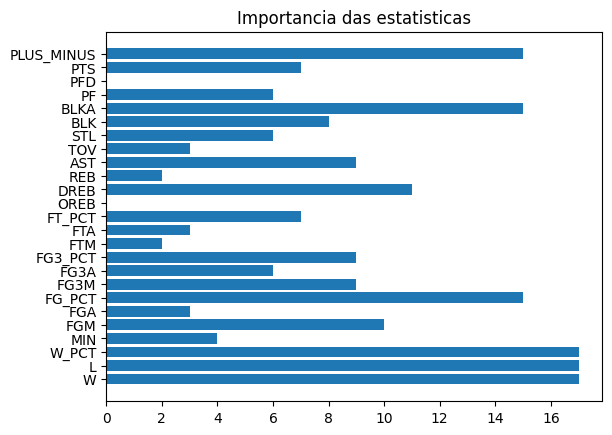

In [ ]:
x = list(importanciaEstatisticas.keys())
y = list(importanciaEstatisticas.values())

plt.barh(x, y)
plt.xlabel('')
plt.ylabel('')
plt.title('Importancia das estatisticas')

plt.show()